# Imports

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


In [ ]:
import tensorflow as tf

from data_loader.data_generator import DataGenerator
from models.gan import GAN
from trainers.gan_trainer import GANTrainer
from utils.config import process_config
from utils.logger import Logger
from utils.utils import get_args
from utils.dirs import create_dirs

# Show image patches from the Dataset

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
import matplotlib.pyplot as plt
from skimage import io

from utils.config import process_config
config_file = 'configs/gan_test.json'
config = process_config(config_file)

data = DataGenerator(config)

dataset = data.dataset
iterator = dataset.make_initializable_iterator()
init = tf.global_variables_initializer()
next_element = iterator.get_next()

with tf.Session() as sess:
    sess.run(init)
    sess.run(iterator.initializer)
    images = sess.run(next_element)
    size = 10
    fig = plt.figure(figsize=(size, size))
    plt.title("Training Images")
    for i in range(size * size):
        plt.subplot(size, size, i+1)
        plt.imshow(1 -images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()
    #print(images[0])
InteractiveShell.ast_node_interactivity = "all"

# Loading the model from checkpoint

In [ ]:

from models.gan_model import GAN
import numpy as np
mod = GAN(config)
with tf.Session() as sess:
    mod.load(sess)

init = tf.global_variables_initializer()
noise = tf.random_normal([config.batch_size,config.noise_dim])
with tf.Session() as sess:
    sess.run(init)
    noise_gen = sess.run(noise)
    feed_dict = {mod.noise_input: noise_gen}
    generator_predictions = sess.run([mod.progress_images], feed_dict=feed_dict)
    gen_p = np.asarray(generator_predictions)
    print(gen_p.shape)
#     size = 4
#     fig = plt.figure(figsize=(size*2, size*2))
#     plt.title("Training Images")
#     for i in range(size * size):
#         plt.subplot(size, size, i+1)
#         plt.imshow(gen_p[i, :, :, 0], cmap='gray')
#         plt.axis('off')
#     plt.show()

# Saving images from Summary Object 

In [ ]:
import os
import scipy.misc
import tensorflow as tf
import imageio as io

def save_images_from_event(fn, tag, output_dir='outputs'):
    assert(os.path.isdir(output_dir))

    image_str = tf.placeholder(tf.string)
    im_tf = tf.image.decode_image(image_str)

    sess = tf.InteractiveSession()
    with sess.as_default():
        count = 0
        for e in tf.train.summary_iterator(fn):
            for v in e.summary.value:
                if v.tag.find(tag) !=-1:
                    im = im_tf.eval({image_str: v.image.encoded_image_string})
                    output_fn = os.path.realpath('{}/image_{:05d}.png'.format(output_dir, count))
                    print("Saving '{}'".format(output_fn))
                    io.imwrite(output_fn, im)
                    count += 1  
#save_images_from_event('./Logs/gan_test_new_noise/summary/train/events.out.tfevents.1553277049.Yigits-MacBook-Pro.local','FromNoise')

# Making gif from generated image samples

In [ ]:
import imageio
import os
from utils.dirs import listdir_nohidden
def make_gif_from_images(folder_name,output_name):
    files = listdir_nohidden(folder_name)
    images = []
    for filename in files:
        images.append(imageio.imread(folder_name+"/"+filename))
    imageio.mimsave(output_name + ".gif", images)
make_gif_from_images("Logs/gan_test_new_noise/generated","./gan_test_new_noise")

In [ ]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense = tf.keras.layers.Dense(4)

  def call(self, inputs, training=False):
    print('Training', training)
    return self.dense(inputs)
    
model = MyModel()
model.compile(optimizer=tf.train.AdagradOptimizer(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

inp = np.ones((5, 3), dtype=np.float32)
out = np.ones((5, 4), dtype=np.float32)

# training should be False
model(inp)

# training should be True
model.fit(inp, out)

In [ ]:
from utils.config import process_config
config_file = 'configs/gan_test.json'
config = process_config(config_file,"mogofogo")

# ALAD Model Tests

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import tensorflow as tf
init = tf.global_variables_initializer()
from models.gan import GAN
from utils.config import process_config
config_file = 'configs/full_training.json'
config = process_config(config_file,"gan_model_test")
mod = GAN(config)
with tf.Session() as sess:
    sess.run(init)
    #mod.load(sess)

Experiment parameters are already stored


In [2]:
tf.get_collection(tf.GraphKeys.UPDATE_OPS)

[<tf.Operation 'DCGAN/Generator/batch_normalization/cond_2/Merge' type=Merge>,
 <tf.Operation 'DCGAN/Generator/batch_normalization/cond_3/Merge' type=Merge>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_1/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_1/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_2/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_2/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_3/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_3/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization_1/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCG

In [3]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'DCGAN/Generator/dense/kernel:0' shape=(100, 12544) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_normalization/gamma:0' shape=(12544,) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_normalization/beta:0' shape=(12544,) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/conv2d_transpose/kernel:0' shape=(5, 5, 128, 256) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_normalization_1/gamma:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_normalization_1/beta:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/conv2d_transpose_1/kernel:0' shape=(5, 5, 128, 128) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_normalization_2/gamma:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_normalization_2/beta:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/conv2d_transpose_2/kernel:0' shape=(5, 5, 128, 128) dtype=float32_ref>,
 <tf.Variable 'DCGAN/Generator/batch_nor

In [4]:
mod.gen_update_ops

[<tf.Operation 'DCGAN/Generator/batch_normalization/cond_2/Merge' type=Merge>,
 <tf.Operation 'DCGAN/Generator/batch_normalization/cond_3/Merge' type=Merge>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_1/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_1/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_2/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_2/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_3/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Generator/batch_normalization_3/AssignMovingAvg_1' type=AssignSub>]

In [5]:
mod.disc_update_ops

[<tf.Operation 'DCGAN/Discriminator_real/batch_normalization/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization_1/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization_1/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization_2/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_real/batch_normalization_2/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_fake/batch_normalization/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_fake/batch_normalization/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_fake/batch_normalization_1/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'DCGAN/Discriminator_fake/batch_normalization_1/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 'DCGAN/Discri

In [2]:
mod.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
__________

In [3]:
mod.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [4]:
mod.generator.updates

[<tf.Operation 'Generator/batch_normalization_3/AssignMovingAvg_1/AssignSubVariableOp' type=AssignSubVariableOp>,
 <tf.Operation 'Generator/batch_normalization_1/AssignMovingAvg_1/AssignSubVariableOp' type=AssignSubVariableOp>,
 <tf.Operation 'Generator/batch_normalization_3/AssignMovingAvg/AssignSubVariableOp' type=AssignSubVariableOp>,
 <tf.Operation 'Generator/batch_normalization_1/AssignMovingAvg/AssignSubVariableOp' type=AssignSubVariableOp>,
 <tf.Operation 'Generator/batch_normalization_2/AssignMovingAvg/AssignSubVariableOp' type=AssignSubVariableOp>,
 <tf.Operation 'Generator/batch_normalization_2/AssignMovingAvg_1/AssignSubVariableOp' type=AssignSubVariableOp>,
 <tf.Operation 'Generator/batch_normalization/cond_3/Merge' type=Merge>,
 <tf.Operation 'Generator/batch_normalization/cond_2/Merge' type=Merge>]

In [5]:
for layer in mod.generator.layers: print(layer.get_config(), layer.get_weights())

{'batch_input_shape': (None, 100), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'} []
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 12544, 'activation': 'relu', 'use_bias': False, 'kernel_initializer': {'class_name': 'TruncatedNormal', 'config': {'mean': 0.0, 'stddev': 0.02, 'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 1.27410935e-02,  2.59592701e-02, -2.32113954e-02, ...,
        -7.57606095e-03, -3.19254361e-02,  2.33180691e-02],
       [ 8.33705440e-03,  2.50706412e-02, -5.86206978e-03, ...,
         2.11949218e-02, -5.71746146e-03,  1.33405672e-02],
       [-2.79933829e-02, -1.07358093e-03,  2.55729221e-02, ...,
         4.29665763e-03, -7.52704171e-03, -9.82791558e-03],
       ...,
       [ 7.68783828e-03, -1.11414306e-03, -2.34308243e-02, ...

In [ ]:
from tensorflow.keras import backend as K
K.learning_phase()

In [ ]:
import tensorflow as tf
from models.alad import ALAD
from utils.config import process_config
config_file = 'configs/alad.json'
config = process_config(config_file,"mogofogo")
mod = ALAD(config)

In [ ]:
mod.encoder.variables

In [ ]:
mod.encoder.updates

In [ ]:
tf.keras.utils.plot_model(mod.discriminator_xz,"test.png",show_shapes=True)


In [ ]:
mod.discriminator_xz.summary()

In [ ]:
mod.discriminator_xx.summary()

In [ ]:
mod.discriminator_zz.summary()

In [ ]:
mod.encoder.updates

In [ ]:
layer = tf.layers.BatchNormalization(trainab=True)

In [ ]:
tf.get_collection(tf.GraphKeys.UPDATE_OPS)

# Eager Execution GAN Tests

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

In [ ]:
import tensorflow as tf
from models.gan_keras import GAN_keras
from utils.config import process_config
config_file = 'configs/gan_keras.json'
config = process_config(config_file,"keras_test")
mod = GAN_keras(config)
with tf.Session() as sess:
    mod.load(sess)

In [ ]:
mod.generator.summary()

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
%matplotlib inline
from models.gan_eager import GAN_eager
from utils.config import process_config
config_file = 'configs/gan_eager.json'
config = process_config(config_file,"eager_test")
mod = GAN_eager(config)
mod.load()
# with tf.Session() as sess:
#      mod.load(sess)
#for layer in mod.generator.layers: print(layer.get_config(), layer.get_weights())
#noise = tf.random.normal([1, 100])
#generated_image = mod.generator(noise, training=False)

#plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Experiment parameters are already stored
ERROR:tensorflow:Couldn't match files for checkpoint Logs/eager_test/checkpoint/ckpt-15


In [4]:
layers =mod.generator.layers
for layer in layers: print(layer.get_config(), layer.get_weights())

{'batch_input_shape': (None, 100), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'} []
{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 12544, 'activation': 'relu', 'use_bias': False, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.02, 'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.00207549, -0.02238554, -0.00857075, ..., -0.04574669,
        -0.0187688 ,  0.00669967],
       [-0.01105371, -0.00028268, -0.03789047, ..., -0.04787889,
        -0.00190146, -0.00232864],
       [-0.03922205, -0.05575958, -0.02791781, ...,  0.03800305,
        -0.00855217, -0.00585291],
       ...,
       [-0.002962  ,  0.01191034, -0.04238536, ...,  0.01763481,
         0.00305778, -0.01041563],
       [-0.01198982, -0.01747559,  0.

In [38]:
#mod.discriminator.summary()
noise = tf.random.normal([1, 28,28,1])
real_out = mod.discriminator(noise,training=False)
print(real_out)

tf.Tensor([[-0.01117538]], shape=(1, 1), dtype=float32)


# Eager Execution Dataset Tests

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
from data_loader.data_generator_eager import DataGenerator_eager

from utils.config import process_config
config_file = 'configs/gan_eager.json'
config = process_config(config_file,"dataset")

data = DataGenerator_eager(config)

Experiment parameters are already stored
DataLoader: Cropped subsets will be populated
DataLoader: generating new dataset with size:32
5 images generated
10 images generated
15 images generated
20 images generated
25 images generated


In [5]:
import numpy as np

In [7]:
a = tf.contrib.eager.Iterator(data.dataset)
    #out = mod.discriminator(da.numpy(),training=False)
    #print(da.numpy().astype(np.float32))

In [22]:
from tqdm import trange
from time import sleep
t =tqdm(["a", "b", "c", "d"])
for i in t:
    t.set_description("Epoch:{} iteration:{}".format(1,i))
    t.refresh() # to show immediately the update
    sleep(0.01)

Epoch:1 iteration:d: 100%|██████████| 4/4 [00:00<00:00, 58.38it/s]


In [19]:
from tqdm import tqdm
pbar = 
for char in pbar:
    pbar.set_description("Processing %s" % char)

Processing d: 100%|██████████| 4/4 [00:00<00:00, 475.64it/s]


In [17]:
a.get_next()

<tf.Tensor: id=954, shape=(128, 32, 32, 1), dtype=float32, numpy=
array([[[[-0.5077215 ],
         [-0.3110719 ],
         [-0.38047764],
         ...,
         [-1.317455  ],
         [-1.3058875 ],
         [-1.2827522 ]],

        [[-0.5077215 ],
         [-0.2648014 ],
         [-0.2648014 ],
         ...,
         [-1.317455  ],
         [-1.317455  ],
         [-1.2943197 ]],

        [[-1.1092378 ],
         [-0.8316149 ],
         [-0.34577477],
         ...,
         [-1.317455  ],
         [-1.317455  ],
         [-1.317455  ]],

        ...,

        [[-0.13755755],
         [-0.19539566],
         [-0.2648014 ],
         ...,
         [ 1.5513153 ],
         [ 1.5628829 ],
         [ 1.6091534 ]],

        [[-0.14912517],
         [-0.19539566],
         [-0.23009853],
         ...,
         [ 1.6322887 ],
         [ 1.620721  ],
         [ 1.5050448 ]],

        [[-0.07971945],
         [-0.12598993],
         [-0.17226042],
         ...,
         [ 1.5628829 ],
         [

# Google DCGAN Eager Implementation Test

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
from __future__ import absolute_import, division, print_function

In [3]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow.keras.layers as layers
import time

from IPython import display

In [4]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [5]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [6]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [7]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [8]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
      
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)  
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)    
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)
  
    return model

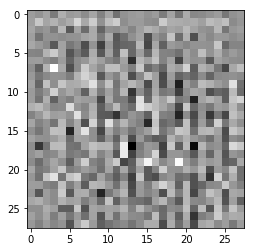

In [9]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [10]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', 
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
      
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
       
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
     
    return model

In [11]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.0005318]], shape=(1, 1), dtype=float32)


In [12]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

AttributeError: module 'tensorflow._api.v1.keras.losses' has no attribute 'BinaryCrossentropy'

In [12]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.losses.sigmoid_cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = tf.losses.sigmoid_cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [13]:
def generator_loss(fake_output):
    return tf.losses.sigmoid_cross_entropy(tf.ones_like(fake_output), fake_output)

In [14]:
generator_optimizer = tf.train.AdamOptimizer(1e-4)
discriminator_optimizer = tf.train.AdamOptimizer(1e-4)

In [15]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [16]:
EPOCHS = 1
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [18]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".

def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [19]:
def train(dataset, epochs):  
    for epoch in range(epochs):
        start = time.time()
    
        for image_batch in dataset:
            train_step(image_batch)

    # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                             epoch + 1,
                             seed)
    
    # Save the model every 15 epochs
       # if (epoch + 1) % 15 == 0:
        #checkpoint.save(file_prefix = checkpoint_prefix)
    
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
    
  # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
train(train_dataset,EPOCHS)

# Batch Normalization Tests

In [14]:
tf.reset_default_graph()
import tensorflow as tf
n_units = 10
in_training_mode = tf.placeholder(tf.bool)
X = tf.keras.layers.Input(shape=(100,))
hidden = tf.keras.layers.Dense(n_units,
                               activation=None)(X) # no activation function, yet
batch_normed = tf.keras.layers.BatchNormalization()(hidden,training=True)
output = tf.keras.activations\
           .relu(batch_normed) # ReLu is typically done after batch normalization

# optimizer code here …

extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
#with tf.control_dependencies(extra_ops):
#    train_op = optimizer.minimize(loss)

In [16]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'dense/kernel:0' shape=(100, 10) dtype=float32>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32>,
 <tf.Variable 'batch_normalization/gamma:0' shape=(10,) dtype=float32>,
 <tf.Variable 'batch_normalization/beta:0' shape=(10,) dtype=float32>]

In [32]:
def dnn_custom_estimator(features, labels, mode, params):
    in_training = mode == tf.estimator.ModeKeys.TRAIN
    use_batch_norm = params['batch_norm']
    
    net = tf.feature_column.input_layer(features, params['features'])
    for i, n_units in enumerate(params['hidden_units']):
        net = build_fully_connected(net, n_units=n_units, training=in_training, 
                                    batch_normalization=use_batch_norm, 
                                    activation=params['activation'],
                                    name='hidden_layer'+str(i))
    
    logits = output_layer(net, 10, batch_normalization=use_batch_norm,
                          training=in_training)
    
    predicted_classes = tf.argmax(logits, 1)
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    accuracy = tf.metrics.accuracy(labels=tf.argmax(labels, 1),
                                   predictions=predicted_classes,
                                   name='acc_op')
    tf.summary.scalar('accuracy', accuracy[1])  # for visualizing in TensorBoard

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(mode, loss=loss,
                                          eval_metric_ops={'accuracy': accuracy})

    # Create training op.
    assert mode == tf.estimator.ModeKeys.TRAIN

    extra_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    optimizer = tf.train.AdamOptimizer(learning_rate=params['learning_rate'])
    with tf.control_dependencies(extra_ops):
        train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())

    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op) 

In [33]:
def train_and_evaluate(output_dir):
    features = [tf.feature_column.numeric_column(key='image_data', shape=(28*28))]
    classifier = tf.estimator.Estimator(model_fn=dnn_custom_estimator,
                                        model_dir=output_dir,
                                        params={'features': features,
                                                'batch_norm': USE_BATCH_NORMALIZATION,
                                                'activation': ACTIVATION,
                                                'hidden_units': HIDDEN_UNITS,
                                                'learning_rate': LEARNING_RATE})

    train_spec = tf.estimator.TrainSpec(input_fn=train_input_fn, max_steps=NUM_STEPS)
    eval_spec = tf.estimator.EvalSpec(input_fn=eval_input_fn)
    tf.estimator.train_and_evaluate(classifier, train_spec, eval_spec)

train_and_evaluate('mnist_model')

NameError: name 'USE_BATCH_NORMALIZATION' is not defined

In [1]:
import tensorflow as tf
print(tf.__version__)
tf.reset_default_graph()

is_training = tf.placeholder_with_default(False, (), 'is_training')
x = tf.placeholder(tf.float32, [None, 1], 'x')
y = tf.layers.batch_normalization(x, training=is_training)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    y = tf.identity(y)

1.12.0


In [2]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

x_1 = [[-10], [0], [10]]
x_2 = [[-10]]
for _ in range(1000):
    y_1 = sess.run(y, feed_dict={x: x_1, is_training: True})
y_2 = sess.run(y, feed_dict={x: x_2})

In [3]:
y_1

array([[-1.2247357],
       [ 0.       ],
       [ 1.2247357]], dtype=float32)

In [5]:
tf.global_variables()

[<tf.Variable 'batch_normalization/gamma:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/beta:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/moving_mean:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'batch_normalization/moving_variance:0' shape=(1,) dtype=float32_ref>]

In [6]:
with tf.variable_scope("", reuse=tf.AUTO_REUSE):
    out = sess.run([tf.get_variable('batch_normalization/moving_mean'),
                    tf.get_variable('batch_normalization/moving_variance')])
    moving_average, moving_variance = out

In [7]:
moving_average

array([0.], dtype=float32)

In [8]:
moving_variance

array([66.66382], dtype=float32)

In [9]:
update_ops

[<tf.Operation 'batch_normalization/cond_2/Merge' type=Merge>,
 <tf.Operation 'batch_normalization/cond_3/Merge' type=Merge>]

In [7]:
import tensorflow as tf
print(tf.__version__)
tf.reset_default_graph()
noise_tensor = tf.placeholder(
                tf.float32, shape=[None, 100], name="noise"
            )
            # Densely connected Neural Network layer with 12544 Neurons.
x_g = tf.layers.Dense(units=7 * 7 * 256, use_bias=False,
                        kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))(noise_tensor)
x_g = tf.layers.batch_normalization(inputs=x_g,momentum=0.8,training=True)
x_g = tf.nn.leaky_relu(features=x_g,alpha=0.5)
x_g = tf.reshape(x_g,shape=[-1,7, 7, 256])
x_g = tf.layers.Conv2DTranspose(filters=128, kernel_size=5, strides=(1, 1), padding="same", use_bias=False,
                                                  kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))(x_g)
assert x_g.get_shape().as_list() == [None, 7, 7, 128]

x_g = tf.layers.batch_normalization(inputs=x_g,momentum=0.8,training=True)
x_g = tf.nn.leaky_relu(features=x_g,alpha=0.5)

x_g = tf.layers.Conv2DTranspose(filters=128, kernel_size=5, strides=(2, 2), padding="same", use_bias=False,
                                  kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))(x_g)
assert x_g.get_shape().as_list() == [None, 14, 14, 128]

x_g = tf.layers.batch_normalization(inputs=x_g,momentum=0.8,training=True)
x_g = tf.nn.leaky_relu(features=x_g,alpha=0.5)

x_g = tf.layers.Conv2DTranspose(filters=128, kernel_size=5, strides=(2, 2), padding="same", use_bias=False,
                                  kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))(x_g)
assert x_g.get_shape().as_list() == [None, 28, 28, 128]
x_g = tf.layers.batch_normalization(inputs=x_g,momentum=0.8,training=True)
x_g = tf.nn.leaky_relu(features=x_g,alpha=0.5)

x_g = tf.layers.Conv2DTranspose(filters=1, kernel_size=5, strides=(1, 1), padding="same", use_bias=False,
                                  activation=tf.nn.tanh,
                                  kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))(x_g)

1.12.0


In [8]:
x_g

<tf.Tensor 'conv2d_transpose_3/Tanh:0' shape=(?, 28, 28, 1) dtype=float32>

In [1]:
import tensorflow as tf
print(tf.__version__)
tf.reset_default_graph()
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = tf.keras.layers.Dense(7*7*64, use_bias=False)
        self.batchnorm1 = tf.keras.layers.BatchNormalization()

        self.conv1 = tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)
        self.batchnorm2 = tf.keras.layers.BatchNormalization()

        self.conv2 = tf.keras.layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False)
        self.batchnorm3 = tf.keras.layers.BatchNormalization()

        self.conv3 = tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False)

    def call(self, x, training=True):
        x = self.fc1(x)
        x = self.batchnorm1(x, training=training)
        x = tf.nn.relu(x)

        x = tf.reshape(x, shape=(-1, 7, 7, 64))

        x = self.conv1(x)
        x = self.batchnorm2(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2(x)
        x = self.batchnorm3(x, training=training)
        x = tf.nn.relu(x)

        x = tf.nn.tanh(self.conv3(x))  
        return x

1.12.0


In [12]:
generator = Generator()
ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

[]

In [3]:
tf.get_collection(tf.GraphKeys.UPDATE_OPS)

[<tf.Operation 'batch_normalization/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 'batch_normalization/AssignMovingAvg_1' type=AssignSub>]